ML
2020220
Assignment -2

Missing values in the dataset after imputation:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


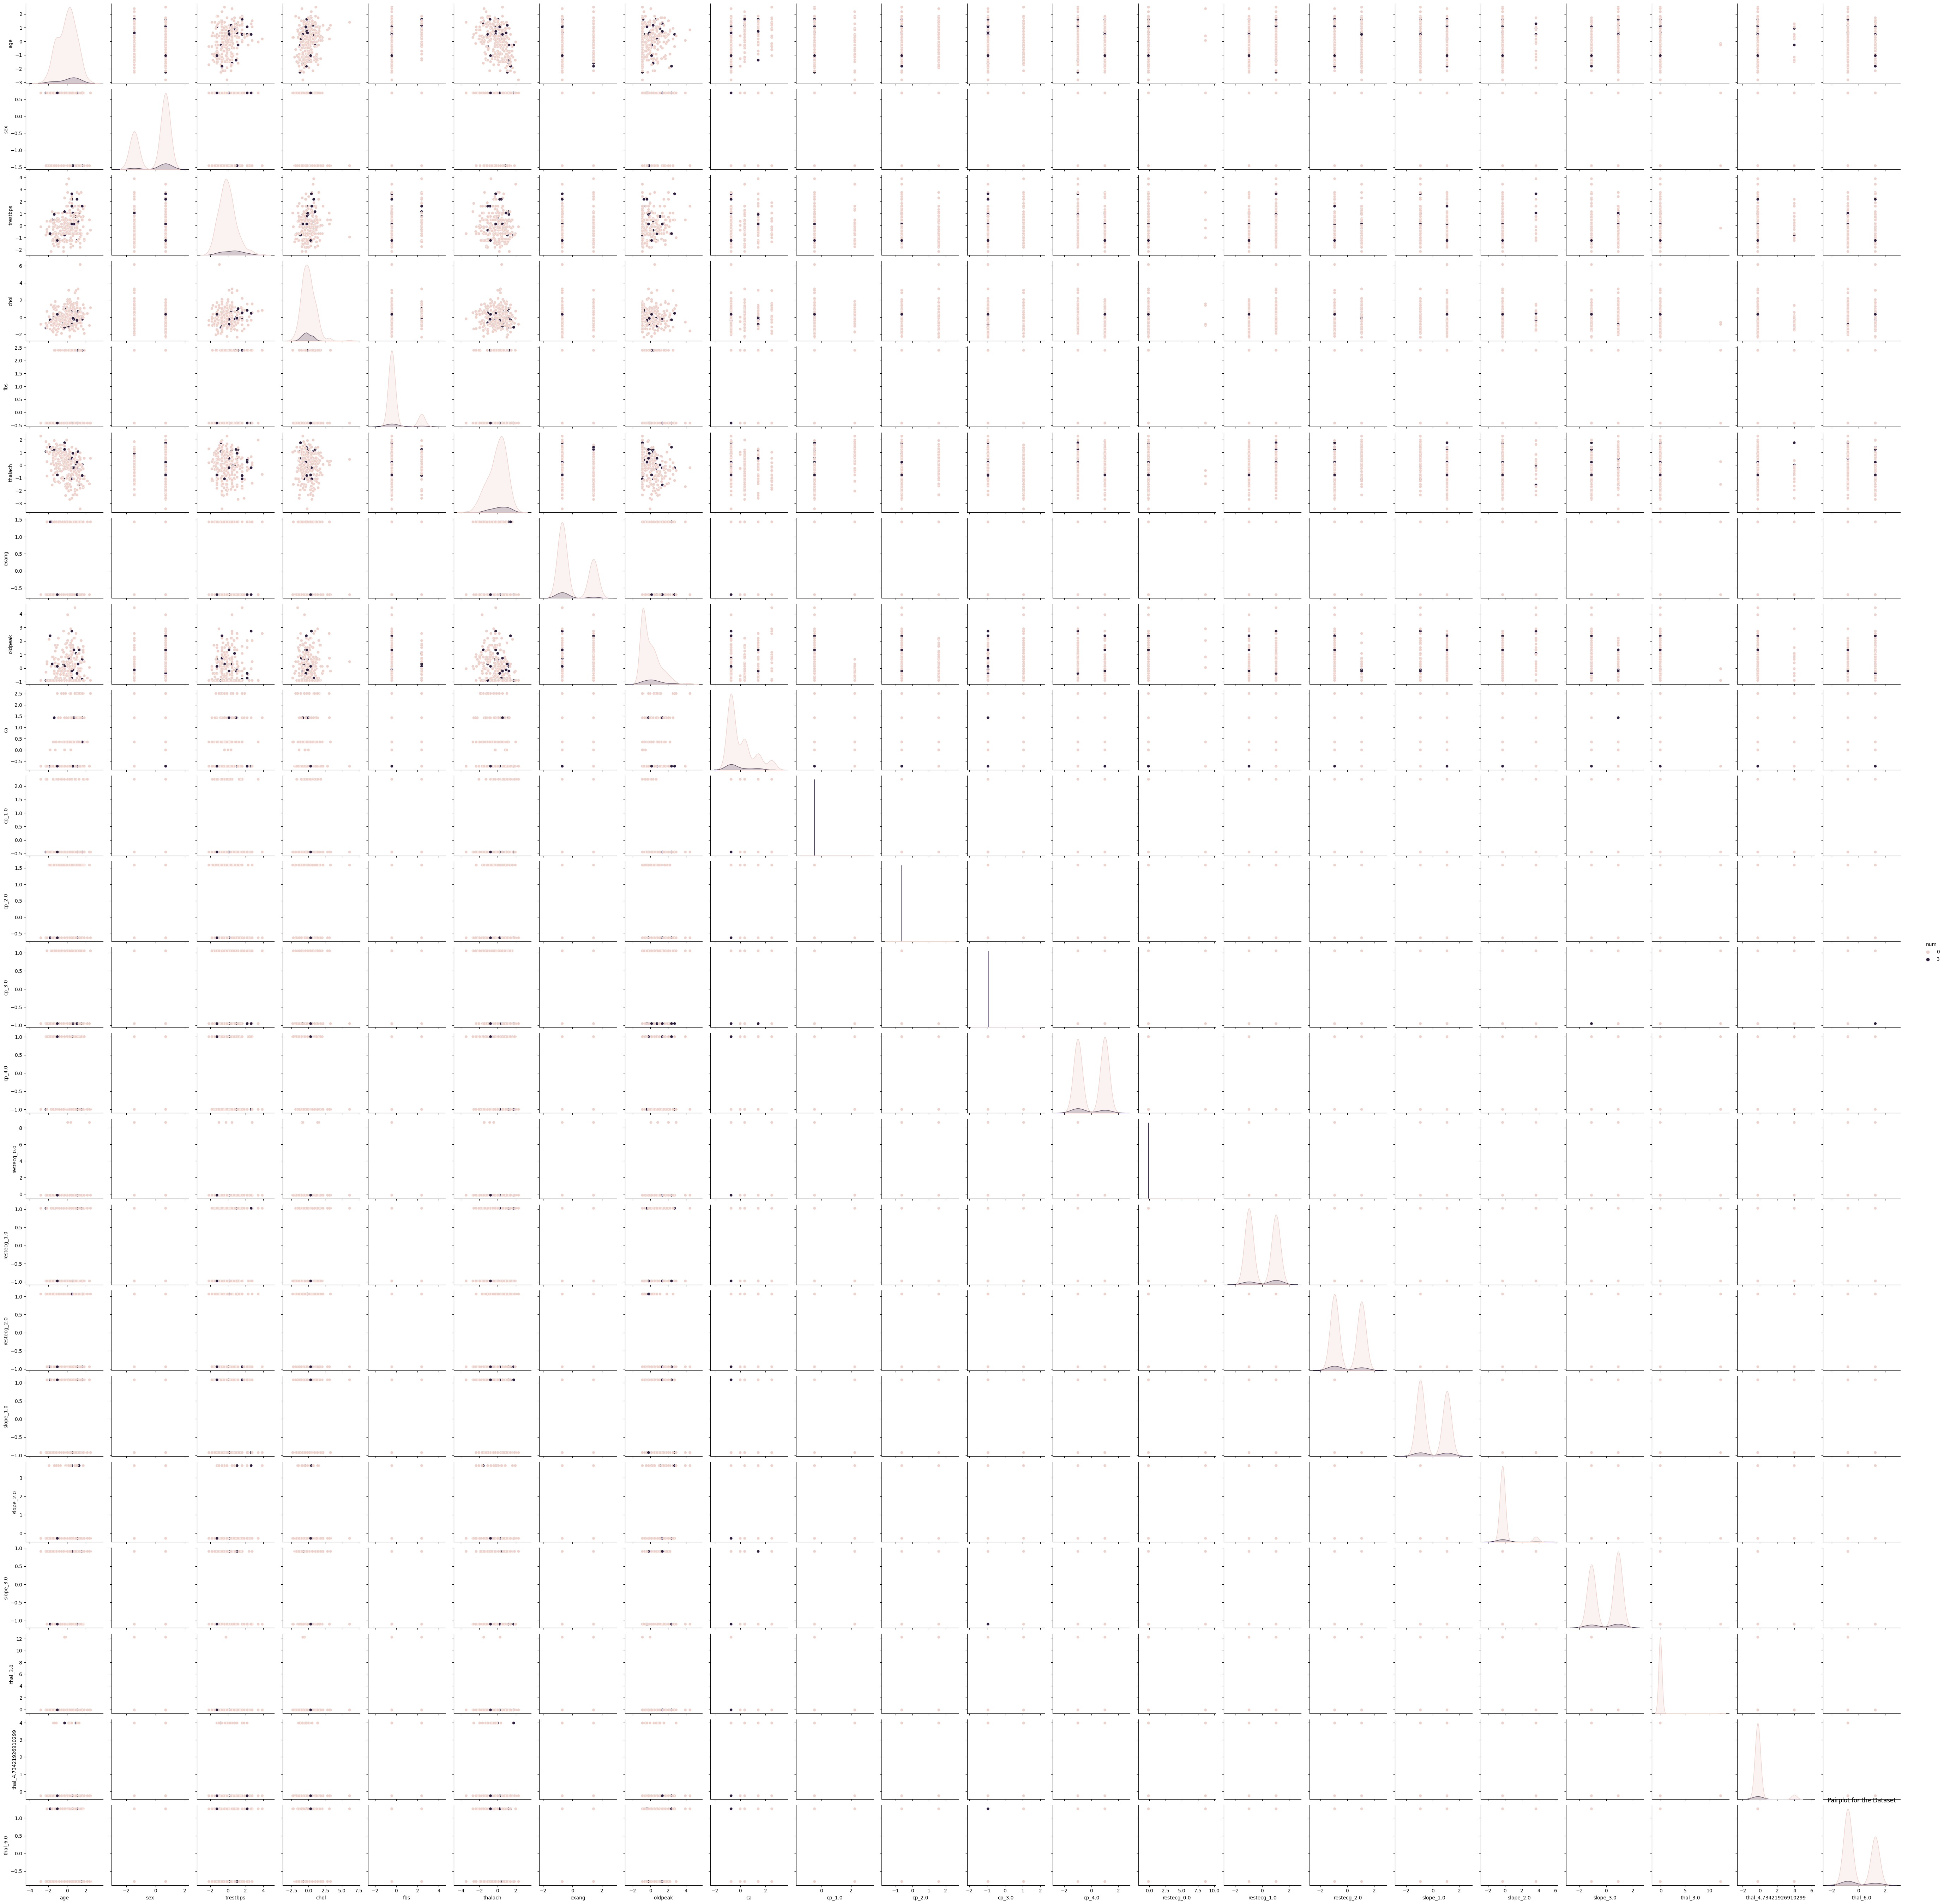

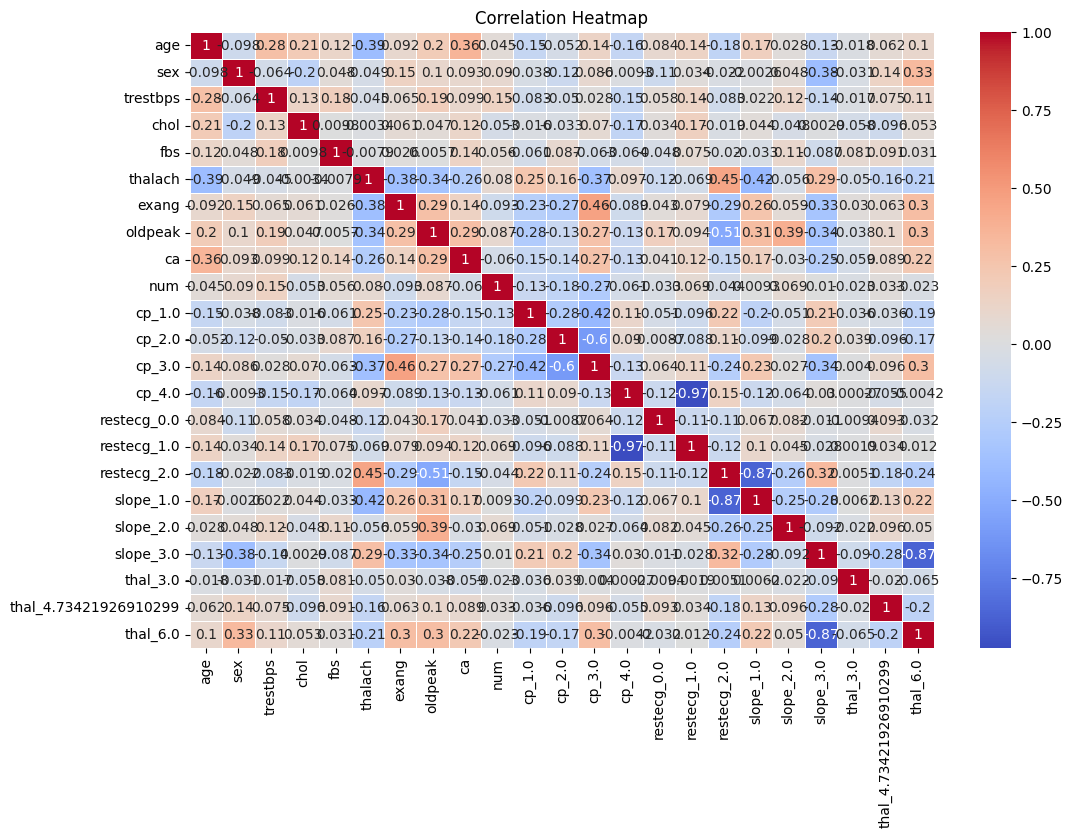

X-train data
          age       sex  trestbps      chol       fbs   thalach     exang  \
109 -1.710926  0.686202 -0.779126 -0.535738 -0.417635 -0.420684 -0.696631   
89  -0.381100 -1.457296 -0.096170  0.180048 -0.417635 -0.026591 -0.696631   
262  0.616270 -1.457296  1.042090 -0.129481 -0.417635  0.936749 -0.696631   
143  1.059545  0.686202 -0.380735  1.205363 -0.417635 -0.814778  1.435481   
299  1.502821  0.686202  0.700612 -1.038723  2.394438 -0.376896 -0.696631   
..        ...       ...       ...       ...       ...       ...       ...   
198 -0.491919 -1.457296 -0.665300 -0.052099 -0.417635  0.542655 -0.696631   
2    1.392002  0.686202 -0.665300 -0.342283 -0.417635 -0.902354  1.435481   
164 -0.713556  0.686202 -0.437648  0.160702  2.394438  1.111901 -0.696631   
242 -0.602738 -1.457296 -0.096170  0.431540 -0.417635  0.586443 -0.696631   
219  0.505451  0.686202  0.359134  0.470232 -0.417635  1.418418 -0.696631   

      oldpeak        ca    cp_1.0  ...    cp_4.0  restecg_0.0 

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

def load_data_file(file_path):
    names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
    data = pd.read_csv(file_path, names=names)
    return data

def load_data():
    url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
    names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
    data = pd.read_csv(url, names=names)
    return data

    # Modify the handle_missing_values function
def handle_missing_values(data):
    data = data.replace('?', pd.NA)
    data = data.apply(pd.to_numeric, errors='coerce')
    data.fillna(data.mean(), inplace=True)  # Filling missing values with mean
    return data


def preprocess_data(data):
    data = pd.get_dummies(data, columns=['cp', 'restecg', 'slope', 'thal'])
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data.drop('num', axis=1))
    data = pd.DataFrame(scaled_data, columns=data.columns[:-1])
    data['num'] = data['num'].astype(int)
    return data

def visualize_data(data):
    sns.pairplot(data, hue='num')
    plt.title('Pairplot for the Dataset')
    plt.show()

    plt.figure(figsize=(12, 8))
    sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title('Correlation Heatmap')
    plt.show()

def split_data(data):
    X = data.drop('num', axis=1)
    y = data['num']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)  # Implementing stratified sampling
    return X_train, X_test, y_train, y_test

def train_decision_trees(X_train, y_train, X_test, y_test):
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # Implementing cross-validation
    dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
    dt_gini = DecisionTreeClassifier(criterion='gini', random_state=42)

    for train_index, test_index in skf.split(X_train, y_train):
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[test_index]

        dt_entropy.fit(X_train_fold, y_train_fold)
        dt_gini.fit(X_train_fold, y_train_fold)

        accuracy_entropy = dt_entropy.score(X_val_fold, y_val_fold)
        accuracy_gini = dt_gini.score(X_val_fold, y_val_fold)

        print("Feature importances (Entropy):", dt_entropy.feature_importances_)
        print("Feature importances (Gini):", dt_gini.feature_importances_)

    if accuracy_entropy > accuracy_gini:
        best_criterion = 'entropy'
    else:
        best_criterion = 'gini'

    return best_criterion, accuracy_entropy, accuracy_gini



def grid_search_decision_trees(X_train, y_train, best_criterion):
    parameters_grid = {
        'min_samples_split': [20, 50, 100],
        'max_features': ['sqrt', 'log2', None]
    }

    grid_search = GridSearchCV(DecisionTreeClassifier(criterion=best_criterion, random_state=42), parameters_grid, cv=5)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_

    max_features_options_dt = X_train.shape[1] if best_params['max_features'] is None else best_params['max_features']

    return best_params, max_features_options_dt

def grid_search_random_forest(X_train, y_train):

    randomf_param_grid = {
        'n_estimators': [50, 100, 300],
        'max_depth': [10, 20, 50],
        'min_samples_split': [50, 100, 20],
        'max_features': ['sqrt', 'log2', None]
    }

    rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42),

    randomf_param_grid, cv=5)

    rf_grid_search.fit(X_train, y_train)
    best_rf_params = rf_grid_search.best_params_
    max_features_options_rf = X_train.shape[1] if best_rf_params['max_features'] is None else best_rf_params['max_features']

    return best_rf_params, max_features_options_rf

def train_random_forest(X_train, y_train, X_test, y_test, best_rf_params):
    rf_classifier = RandomForestClassifier(**best_rf_params, random_state=42)
    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test)
    print("Classification report for the Random Forest Classifier:")
    print(classification_report(y_test, y_pred))




if __name__ == '__main__':

  # file_path = 'your_local_file_path_here.csv'  # Replace with the correct file path
  #   data = load_data(file_path)

  ## loading data via online dataset
    data = load_data()
    print("Missing values in the dataset after imputation:")
    print(data.isnull().sum())

    data = handle_missing_values(data)
    data = preprocess_data(data)
    visualize_data(data)

    X_train, X_test, y_train, y_test = split_data(data)

    print("X-train data")
    print(X_train)
    print()
    print()
    print("X-test data")
    print(X_test)
    print()
    print()
    print("Y-test data")
    print(y_test)
    print()
    print()
    print("Y-train data")
    print(y_train)


    print()
    print()

    best_criterion,accuracy_entropy,accuracy_gini = train_decision_trees(X_train, y_train, X_test, y_test)

    print(f"best criterion  : {best_criterion}")
    print(f"accuracy_entropy  : {accuracy_entropy}")
    print(f"accuacy_gini  : {accuracy_gini}")

    best_params, max_features_options_dt = grid_search_decision_trees(X_train, y_train, best_criterion)
    print(f"Best combination of hyperparameters: {best_params}")
    print(f"Available options for max_features in Decision Tree: {max_features_options_dt}")

    best_rf_params, max_features_options_rf = grid_search_random_forest(X_train, y_train)
    print(f"Best combination of hyperparameters for Random Forest: {best_rf_params}")
    print(f"Available options for max_features in Random Forest: {max_features_options_rf}")

    train_random_forest(X_train, y_train, X_test, y_test, best_rf_params)
    print()
    print()

In [ ]:

import numpy as np
import pandas as pd

class MyDecisionTree:
    def __init__(self, max_depth):
        self.max_depth = max_depth

    def gini_index(self, groups, classes):
        total_instances = float(sum([len(group) for group in groups]))
        gini = 0.0
        for group in groups:
            group_size = float(len(group))
            if group_size == 0:
                continue
            score = 0.0
            for class_val in classes:
                p = [row[-1] for row in group].count(class_val) / group_size
                score += p * p
            gini += (1.0 - score) * (group_size / total_instances)
        return gini

    def make_split(self, dataset):
        class_values = list(set(row[-1] for row in dataset))
        best_index, best_value, best_score, best_groups = 999, 999, 999, None
        for index in range(len(dataset[0]) - 1):
            for row in dataset:
                groups = self.test_split(index, row[index], dataset)
                gini = self.gini_index(groups, class_values)
                if gini < best_score:
                    best_index, best_value, best_score, best_groups = index, row[index], gini, groups
        return {'index': best_index, 'value': best_value, 'groups': best_groups}

    def test_split(self, index, value, dataset):
        left, right = list(), list()
        for row in dataset:
            if row[index] < value:
                left.append(row)
            else:
                right.append(row)
        return left, right

    def to_terminal(self, group):
        outcomes = [row[-1] for row in group]
        return max(set(outcomes), key=outcomes.count)

    def split(self, node, max_depth, min_size, depth):
        left, right = node['groups']
        del (node['groups'])
        if not left or not right:
            node['left'] = node['right'] = self.to_terminal(left + right)
            return
        if depth >= max_depth:
            node['left'], node['right'] = self.to_terminal(left), self.to_terminal(right)
            return
        if len(left) <= min_size:
            node['left'] = self.to_terminal(left)
        else:
            node['left'] = self.make_split(left)
            self.split(node['left'], max_depth, min_size, depth + 1)
        if len(right) <= min_size:
            node['right'] = self.to_terminal(right)
        else:
            node['right'] = self.make_split(right)
            self.split(node['right'], max_depth, min_size, depth + 1)

    def build_tree(self, train, max_depth, min_size):
        root = self.make_split(train)
        self.split(root, max_depth, min_size, 1)
        return root


    def pruning(self, tree, depth=0):
        if 'groups' in tree:
            if not tree['left'] or not tree['right']:
                tree['left'] = tree['right'] = self.to_terminal(tree['groups'])
            if depth >= self.max_depth:
                tree['left'] = self.to_terminal(tree['groups'][0])
                tree['right'] = self.to_terminal(tree['groups'][1])
            if isinstance(tree['left'], dict):
                self.pruning(tree['left'], depth + 1)
            if isinstance(tree['right'], dict):
                self.pruning(tree['right'], depth + 1)


    def predict(self, node, row):
        if row[node['index']] < node['value']:
            if isinstance(node['left'], dict):
                return self.predict(node['left'], row)
            else:
                return node['left']
        else:
            if isinstance(node['right'], dict):
                return self.predict(node['right'], row)
            else:
                return node['right']

    def fit(self, features, target):
        dataset = np.column_stack((features, target))
        self.tree = self.build_tree(dataset, self.max_depth, 1)

    def evaluate_accuracy(self, features, target):
        predictions = []
        for row in features:
            prediction = self.predict(self.tree, row)
            predictions.append(prediction)
        predictions = np.array(predictions)
        accuracy = np.mean(predictions == target)
        return accuracy

# Load the dataset
# Replace 'your_data.csv' with the actual path to your data file
data = pd.read_csv('/content/Thyroid data - Sheet1.csv')

# Preprocess the data
# Assuming the data is preprocessed and encoded properly

# Mapping the classes to binary values (0 and 1)
data['label'] = data['label'].map({'negative': 0, 'hyperthyroid': 1, 'T3 toxic': 1, 'goitre': 1})

# Extract features and target variable
features = data.drop('label', axis=1).values
target = data['label'].values

# Creating an instance of MyDecisionTree
max_tree_depth = 5  # Example max depth, you can change it to any desired value
decision_tree_model = MyDecisionTree(max_tree_depth)

# Fitting the decision tree on the data
decision_tree_model.fit(features, target)

# Pruning the decision tree
decision_tree_model.pruning(decision_tree_model.tree)

# Evaluating the model
accuracy = decision_tree_model.evaluate_accuracy(features, target)
print(f"Accuracy of the Decision Tree model: {accuracy:.2f}")



In [ ]:

import numpy as np
import pandas as pd

class MyDecisionTree:
    def __init__(self, max_depth):
        self.max_depth = max_depth

    def gini_index(self, groups, classes):
        total_instances = float(sum([len(group) for group in groups]))
        gini = 0.0
        for group in groups:
            group_size = float(len(group))
            if group_size == 0:
                continue
            score = 0.0
            for class_val in classes:
                p = [row[-1] for row in group].count(class_val) / group_size
                score += p * p
            gini += (1.0 - score) * (group_size / total_instances)
        return gini

    def make_split(self, dataset):
        class_values = list(set(row[-1] for row in dataset))
        best_index, best_value, best_score, best_groups = 999, 999, 999, None
        for index in range(len(dataset[0]) - 1):
            for row in dataset:
                groups = self.test_split(index, row[index], dataset)
                gini = self.gini_index(groups, class_values)
                if gini < best_score:
                    best_index, best_value, best_score, best_groups = index, row[index], gini, groups
        return {'index': best_index, 'value': best_value, 'groups': best_groups}



    def split(self, node, max_depth, min_size, depth):
        left, right = node['groups']
        del (node['groups'])
        if not left or not right:
            node['left'] = node['right'] = self.to_terminal(left + right)
            return
        if depth >= max_depth:
            node['left'], node['right'] = self.to_terminal(left), self.to_terminal(right)
            return
        if len(left) <= min_size:
            node['left'] = self.to_terminal(left)
        else:
            node['left'] = self.make_split(left)
            self.split(node['left'], max_depth, min_size, depth + 1)
        if len(right) <= min_size:
            node['right'] = self.to_terminal(right)
        else:
            node['right'] = self.make_split(right)
            self.split(node['right'], max_depth, min_size, depth + 1)

    def build_tree(self, train, max_depth, min_size):
        root = self.make_split(train)
        self.split(root, max_depth, min_size, 1)
        return root

    def test_split(self, index, value, dataset):
        left, right = list(), list()
        for row in dataset:
            if row[index] < value:
                left.append(row)
            else:
                right.append(row)
        return left, right

    def to_terminal(self, group):
        outcomes = [row[-1] for row in group]
        return max(set(outcomes), key=outcomes.count)


    def fit(self, features, target):
        dataset = np.column_stack((features, target))
        self.tree = self.build_tree(dataset, self.max_depth, 1)


    def pruning(self, tree, depth=0):
        if 'groups' in tree:
            if not tree['left'] or not tree['right']:
                tree['left'] = tree['right'] = self.to_terminal(tree['groups'])
            if depth >= self.max_depth:
                tree['left'] = self.to_terminal(tree['groups'][0])
                tree['right'] = self.to_terminal(tree['groups'][1])
            if isinstance(tree['left'], dict):
                self.pruning(tree['left'], depth + 1)
            if isinstance(tree['right'], dict):
                self.pruning(tree['right'], depth + 1)


    def predict(self, node, row):
        if row[node['index']] < node['value']:
            if isinstance(node['left'], dict):
                return self.predict(node['left'], row)
            else:
                return node['left']
        else:
            if isinstance(node['right'], dict):
                return self.predict(node['right'], row)
            else:
                return node['right']



    def evaluate_accuracy(self, features, target):
        predictions = []
        for row in features:
            prediction = self.predict(self.tree, row)
            predictions.append(prediction)
        predictions = np.array(predictions)
        accuracy = np.mean(predictions == target)
        return accuracy



# Load the dataset

data = pd.read_csv('/content/Thyroid data - Sheet1.csv')

# Preprocess the data

# Mapping the classes to binary values (0 and 1)
data['label'] = data['label'].map({'negative': 0, 'hyperthyroid': 1, 'T3 toxic': 1, 'goitre': 1})

# Extract features and target variable
features = data.drop('label', axis=1).values
target = data['label'].values

# Creating an instance of MyDecisionTree
max_tree_depth = 5
decision_tree_model = MyDecisionTree(max_tree_depth)

# Fitting the decision tree on the data
decision_tree_model.fit(features, target)

# Pruning the decision tree
decision_tree_model.pruning(decision_tree_model.tree)

# Evaluating the model
accuracy = decision_tree_model.evaluate_accuracy(features, target)
print(f"Accuracy of the Decision Tree model: {accuracy:.2f}")

